# loading dataset and preprocessing

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
import seaborn as sns


Load the dataset

In [2]:
data = pd.read_csv('kidney_disease.csv')

data preprocessing 

In [3]:
data.shape

(400, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
data['classification'] = data['classification'].map({'ckd':1,'notckd':0})
data['htn'] = data['htn'].map({'yes':1,'no':0})
data['dm'] = data['dm'].map({'yes':1,'no':0})
data['cad'] = data['cad'].map({'yes':1,'no':0})
data['appet'] = data['appet'].map({'good':1,'poor':0})
data['ane'] = data['ane'].map({'yes':1,'no':0})
data['pe'] = data['pe'].map({'yes':1,'no':0})
data['ba'] = data['ba'].map({'present':1,'notpresent':0})
data['pcc'] = data['pcc'].map({'present':1,'notpresent':0})
data['pc'] = data['pc'].map({'abnormal':1,'normal':0})
data['rbc'] = data['rbc'].map({'abnormal':1,'normal':0})
data['classification'].value_counts()

1.0    248
0.0    150
Name: classification, dtype: int64

In [8]:
data.shape[0], data.dropna().shape[0]

(400, 158)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    float64
 7   pc              335 non-null    float64
 8   pcc             396 non-null    float64
 9   ba              396 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [10]:
data.dropna(inplace=True)

In [11]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
9,9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,...,29,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0
11,11,63.0,70.0,1.010,3.0,0.0,1.0,1.0,1.0,0.0,...,32,4500,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1.0
14,14,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,...,16,11000,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1.0
20,20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,...,24,9200,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [12]:
data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)

# Part 1

# Logistic regression and confusion matrix

logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


logreg = LogisticRegression()

X = data.iloc[:,:-1]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)

logreg.fit(X_train,y_train)

C:\opt\anaconda\envs\ds\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [14]:

test_pred = logreg.predict(X_test)
train_pred = logreg.predict(X_train)
print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_pred))


Train Accuracy:  1.0
Test Accuracy:  1.0


In [15]:
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score:",acc)
print("precision_score:", prec)
print("recal_score:", recall)

accuracy_score: 1.0
precision_score: 1.0
recal_score: 1.0


In [16]:
results = {"algorithms":[],"accuracy":[]}
results["algorithms"].append("logistic regression")
results["accuracy"].append(accuracy_score(y_test,y_pred))

confusion matrix

In [17]:
from sklearn.metrics import  confusion_matrix

In [18]:
sns.set(font_scale=1.5)

In [19]:
def plot_conf_mat(y_test,y_preds):
    """
    This function will be heloing in plotting the confusion matrix by using seaborn
    """
    
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

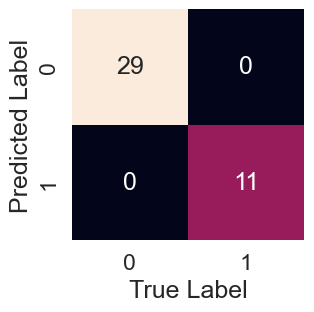

In [20]:
log_pred = logreg.predict(X_test)
plot_conf_mat(y_test, log_pred)


In [21]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 29
False Pos: 0
False Neg: 0
True Pos: 11


# K-Nearest Neighbors Classifier

In [22]:
data["class"].value_counts()

0.0    115
1.0     43
Name: class, dtype: int64

In [23]:
balanced_df = pd.concat([data[data["class"] == 0], data[data["class"] == 1].sample(n = 115, replace = True)], axis = 0)
balanced_df.reset_index(drop=True, inplace=True)
balanced_df["class"].value_counts()

0.0    115
1.0    115
Name: class, dtype: int64

In [24]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier()

params = {
    "n_neighbors":[3,5,7,9],
    "weights":["uniform","distance"],
    "algorithm":["ball_tree","kd_tree","brute"],
    "leaf_size":[25,30,35],
    "p":[1,2]
}

gs = GridSearchCV(knn, param_grid=params)
model = gs.fit(X_train,y_train)
preds = model.predict(X_test)
accuracy_score(y_test, preds)

0.975

In [27]:
results["algorithms"].append("knn")
results["accuracy"].append(accuracy_score(y_test,preds))

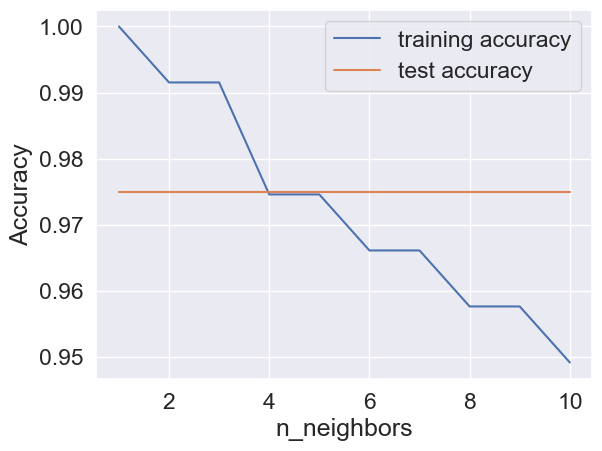

In [28]:
training_accuracy = []
test_accuracy = []  
#try n_neighbors from 1 to 10
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    
#build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
#record training set accuracy
    training_accuracy.append(knn.score(X_train,y_train))
    
#record test set accuracy
    test_accuracy.append(knn.score(X_test,y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig("knn_compare_model")

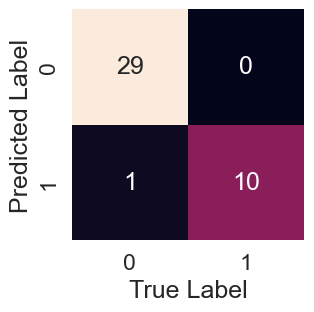

In [29]:
knn_pred = model.predict(X_test)
plot_conf_mat(y_test, knn_pred)


In [30]:
print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 29
False Pos: 0
False Neg: 0
True Pos: 11


# Decision tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree   
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 1.0 

Confusion Matrix :- 
[[29  0]
 [ 0 11]]



In [32]:
results["algorithms"].append("Decision tree")
results["accuracy"].append(accuracy_score(y_test, dtc.predict(X_test)))

In [33]:
x=data.drop(["class"], axis=1)
fig = plt.figure(figsize=(100,100))
tree.plot_tree(dtc,
                   feature_names=x.columns.values.tolist(),  
                   class_names="data['class'].unique()",
                   filled=True)
fig.savefig("tree1.png")


# Random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")


Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 1.0 

Confusion Matrix :- 
[[29  0]
 [ 0 11]]



In [35]:
results["algorithms"].append("random forest")
results["accuracy"].append(accuracy_score(y_train, rd_clf.predict(X_train)))

In [37]:
df1 =pd.DataFrame(results)

In [38]:
df1

,algorithms,accuracy
0,logistic regression,1.000
1,knn,0.975
2,Decision tree,1.000
3,random forest,1.000


C:\opt\anaconda\envs\ds\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  after removing the cwd from sys.path.


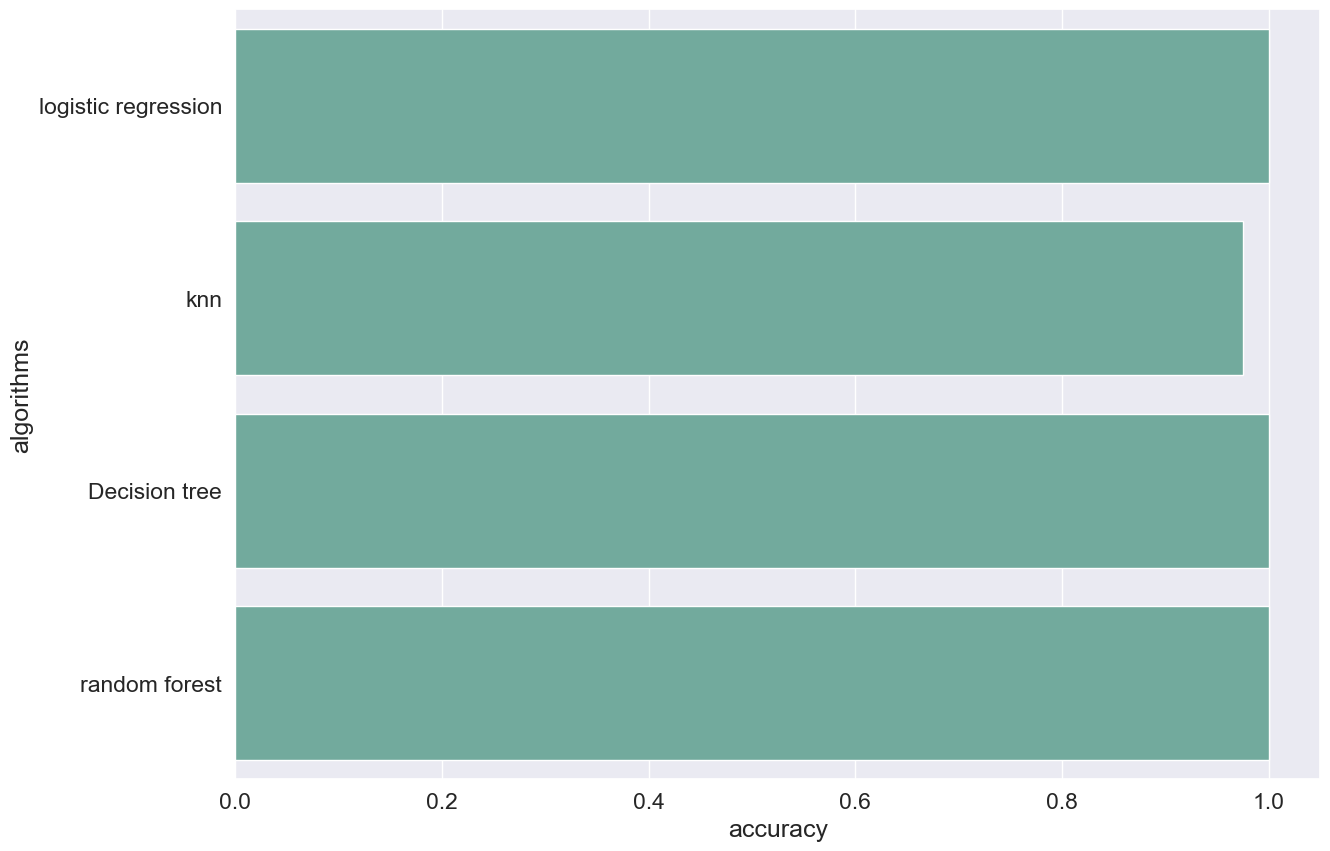

In [39]:
plt.figure(figsize=(14, 10))

# plot a bar chart
sns.barplot( y="algorithms",  x="accuracy", data=df1,  estimator=sum,  ci=None,   color='#69b3a2');

# Part 2

 Drop out the target variable

In [41]:
data.drop("class", axis=1, inplace=True)

Normalizing and reducing the dimensions of the data

In [43]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [44]:
# Standardize data
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(data) 
  
# Normalizing the Data 
normalized_data = normalize(scaled_data) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_data = pd.DataFrame(normalized_data) 

# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_data) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

Hierarchical Clustering

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [67]:
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(X_principal)

In [68]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,1
2,1
3,1
4,1
...,...
153,0
154,0
155,0
156,0


Plot the clusters

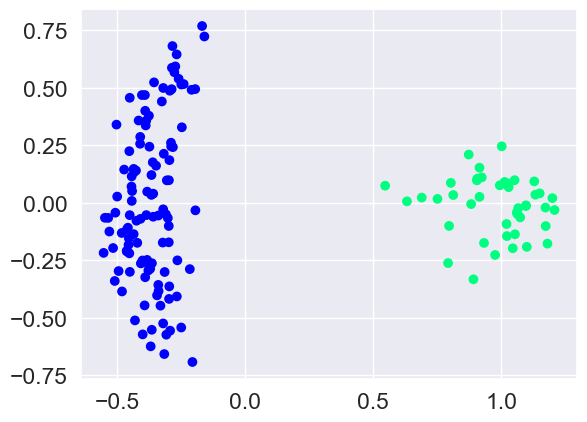

In [72]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 2).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

Plot the dendrogram

In [52]:
from sklearn.cluster import KMeans

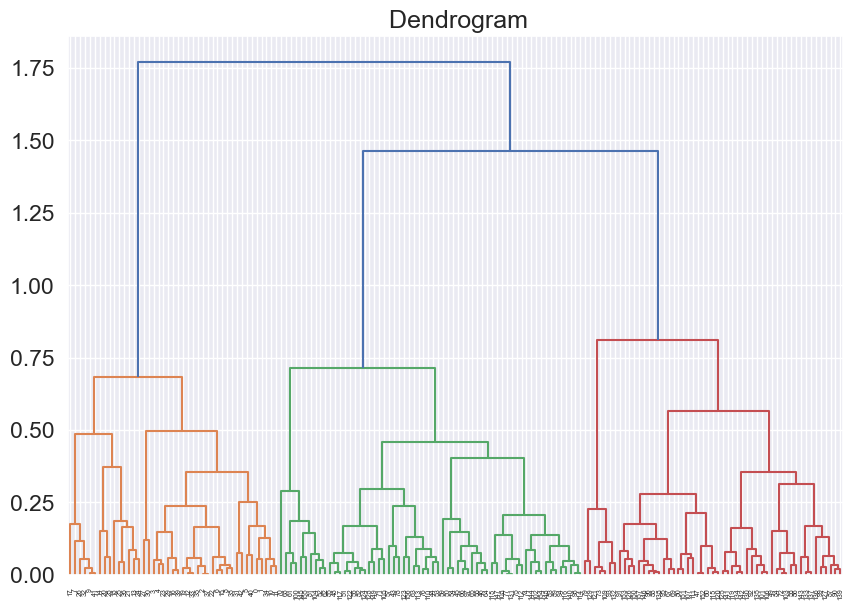

In [85]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title(" Dendrogram")
dend=shc.dendrogram(shc.linkage(X_principal, method="complete"))

In [55]:
from sklearn.cluster import KMeans

In [73]:
kmeans=KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_principal)

KMeans(n_clusters=3, random_state=0)

In [74]:
labels=kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 0])

In [58]:
clusters = pd.concat([data, pd.DataFrame({"cluster":labels})], axis=1)

In [75]:
pca = PCA(2)
principalComponents = pca.fit_transform(normalized_data)
x, y = principalComponents[:, 0], principalComponents[:, 1]
print(principalComponents.shape)
colors = {0: "red", 1: "blue", 2: "green", }

(158, 2)


In [76]:
final_data = pd.DataFrame({"x": x, "y":y, "label":labels})
groups = final_data.groupby(labels)

In [77]:
kmeans.predict(X_principal)
print(kmeans.cluster_centers_)

[[-0.33723579  0.36289843]
 [ 0.98018008 -0.01335442]
 [-0.38673031 -0.24238214]]


In [78]:
sum_of_squared_distances = []
K= range (1,15)
for k in K:
    km= KMeans(n_clusters=k)
    km=km.fit(final_data)
    sum_of_squared_distances.append(km.inertia_)
print(sum_of_squared_distances)

[185.8140527181795, 71.19322952318151, 6.585210673629289, 4.807065844664342, 3.5076634354196474, 2.784177577833161, 2.295125827297577, 1.973497892268862, 1.7284060759443154, 1.5217756977076509, 1.347676831101736, 1.231913895818451, 1.1541560160108557, 1.0217960719590409]


the optimal k

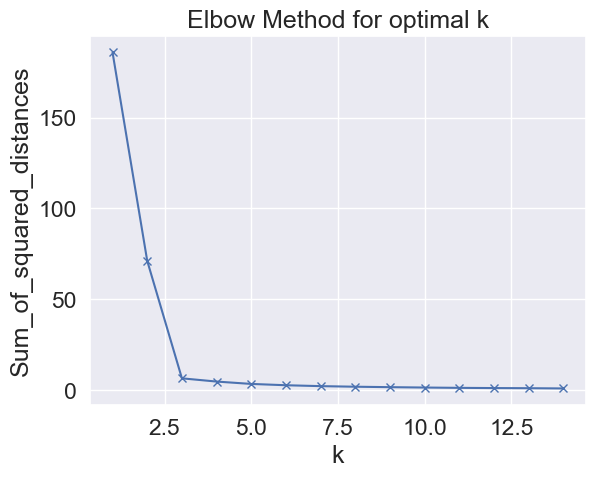

In [81]:
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("k")
plt.ylabel("Sum_of_squared_distances")
plt.title("Elbow Method for optimal k")
plt.show()

Plot the clusters. 

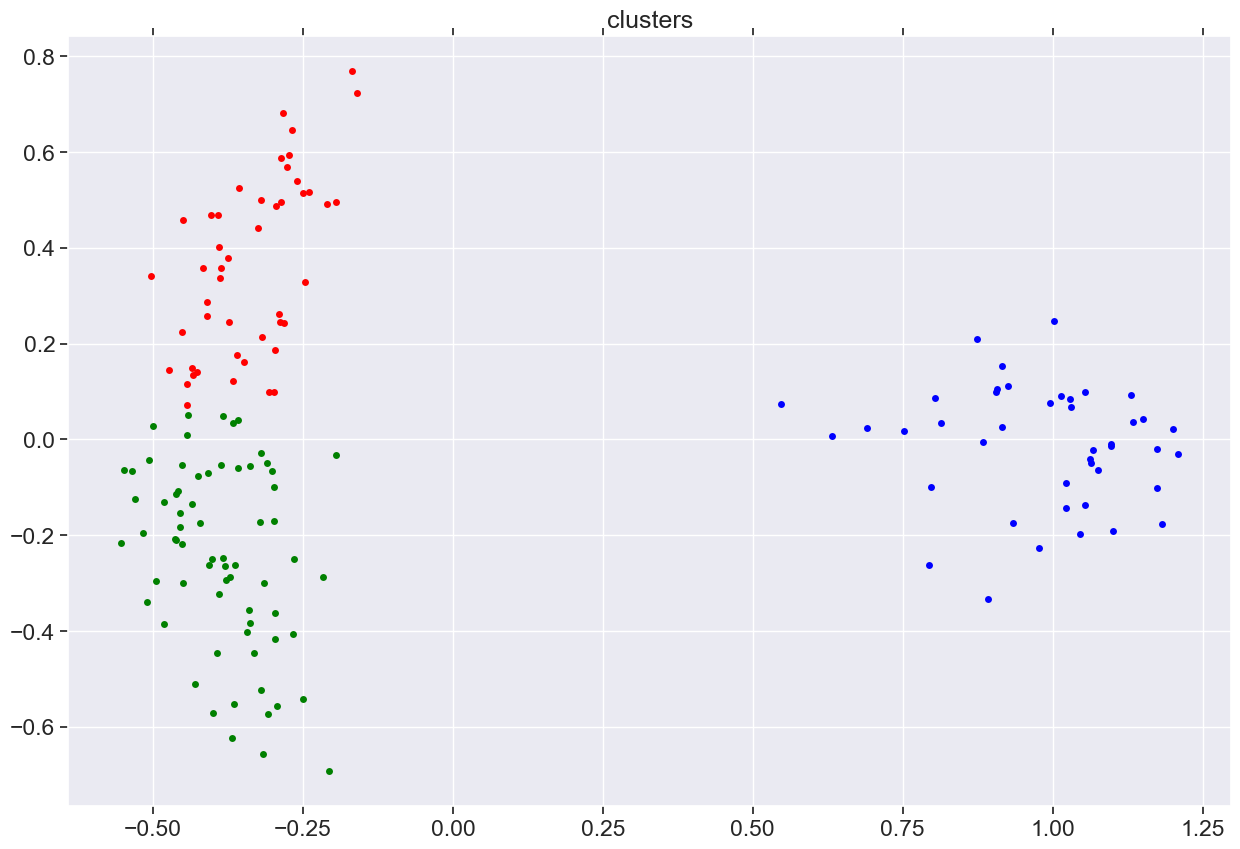

In [84]:
fig, ax = plt.subplots(figsize=(15, 10))
for name, group in groups:
  ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, color=colors[name], mec='none')
  ax.set_aspect('auto')
  ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
  ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.set_title("clusters")
plt.show()